In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive//data/anemia.csv')
print ("Shape of dataset: ")
data

Shape of dataset: 


Gender  Hemoglobin   MCH  MCHC   MCV  Result
0          0        15.2  29.9  33.4  89.3       0
1          0        11.9  31.0  32.5  95.4       1
2          0        17.2  31.1  34.3  90.5       0
3          0        12.9  28.0  34.0  82.1       0
4          1        14.5  30.6  33.0  92.8       0
...      ...         ...   ...   ...   ...     ...
8539       0        12.7  27.8  33.3  83.6       0
8540       0        14.9  29.3  32.9  88.9       0
8541       1        12.2  28.9  35.0  82.7       1
8542       1        12.2  29.2  32.8  89.1       1
8543       0        13.7  27.2  33.7  80.7       0

[8544 rows x 6 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      8544 non-null   int64  
 1   Hemoglobin  8544 non-null   float64
 2   MCH         8544 non-null   float64
 3   MCHC        8544 non-null   float64
 4   MCV         8544 non-null   float64
 5   Result      8544 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 400.6 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)

In [ ]:
data.head()

Gender  Hemoglobin  MCH  MCHC  MCV  Result
0       0          70  115    39  271       0
1       0          37  126    30  332       1
2       0          90  127    48  283       0
3       0          47   96    45  199       0
4       1          63  122    35  306       0

In [ ]:
import seaborn as sns
#sns.set_style("darkgrid")

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
group = df.groupby('Result')['Hemoglobin'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='counts',x=group.index, y=group.values, marker_line_color='black', marker_line_width=2,
                     text=group.values,textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Case',nticks=3)
fig.update_layout(template='seaborn',hovermode='closest',title='Yes vs No',
                 width=700,height=400,xaxis=dict(mirror=True,linecolor='black',linewidth=2),
                 yaxis=dict(mirror=True,linecolor='black',linewidth=2),margin=dict(t=50,b=0,l=70,r=0))
fig.show()

In [ ]:
print('Percentage of Non Anemia: {}%'.format(round(df.Result.value_counts()[0]/len(df) * 100.0,2)))
print('Percentage of Anemia: {}%'.format(round(df.Result.value_counts()[1]/len(df) * 100.0,2)))

Percentage of Non Anemia: 66.01%
Percentage of Anemia: 33.99%


In [ ]:
df.describe()

Gender   Hemoglobin          MCH         MCHC          MCV  \
count  8544.000000  8544.000000  8544.000000  8544.000000  8544.000000   
mean      0.508895    13.683169    29.438635    33.809890    87.017170   
std       0.499950     1.487922     2.556528     1.035187     6.466476   
min       0.000000     6.400000    16.800000    28.000000    55.700000   
25%       0.000000    12.700000    28.100000    33.300000    83.200000   
50%       1.000000    13.600000    29.700000    33.800000    87.500000   
75%       1.000000    14.700000    31.100000    34.400000    91.300000   
max       1.000000    19.500000    74.500000    69.600000   115.300000   

            Result  
count  8544.000000  
mean      0.339888  
std       0.473699  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [ ]:
df.head()

Gender  Hemoglobin   MCH  MCHC   MCV  Result
0       0        15.2  29.9  33.4  89.3       0
1       0        11.9  31.0  32.5  95.4       1
2       0        17.2  31.1  34.3  90.5       0
3       0        12.9  28.0  34.0  82.1       0
4       1        14.5  30.6  33.0  92.8       0

In [ ]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (8544, 4)
Y Shape (8544,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (6835, 4)
Number transations x_test df (1709, 4)
Number transations y_train df (6835,)
Number transations y_test df (1709,)


In [ ]:
models = []
models.append(['KNeigbors',KNeighborsClassifier(n_neighbors=3)])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report, precision_score,average_precision_score
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies_normal = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

KNeigbors :
[[1011  124]
 [ 105  469]]
Accuracy Score:  0.8660035108250439

K-Fold Validation Mean Accuracy: 90.09 %

Standard Deviation: 1.14 %

ROC AUC Score: 0.85 %

Precision: 0.79 %

Recall: 0.82 %

F1 Score: 0.80 %
----------------------------------------



#SMOTE

In [ ]:
# SMOTE
# pip install imblearn
# from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 2330
Before OverSampling, counts of label 0: 4505 



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (9010, 4)
After OverSampling, the shape of train_y: (9010,)
After OverSampling, counts of label 1: 4505
After OverSampling, counts of label 0: 4505


In [ ]:
models = []
models.append(['KNeigbors',KNeighborsClassifier(n_neighbors=3)])


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report, precision_score,average_precision_score
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies_smote = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

KNeigbors :
[[980 155]
 [ 72 502]]
Accuracy Score:  0.8671737858396723

K-Fold Validation Mean Accuracy: 90.09 %

Standard Deviation: 1.14 %

ROC AUC Score: 0.87 %

Precision: 0.76 %

Recall: 0.87 %

F1 Score: 0.82 %
----------------------------------------



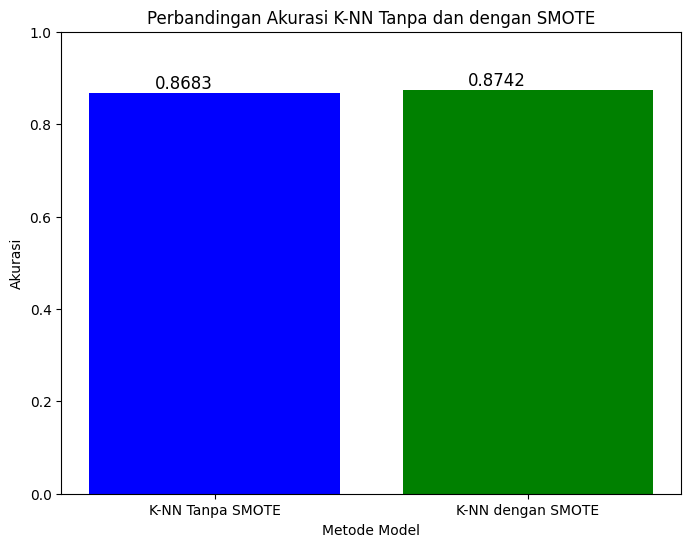

In [ ]:

# Apply label encoding to convert categorical data
data = data.apply(LabelEncoder().fit_transform)

# Prepare features (X) and target (y)
x = data.iloc[:,1 :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize K-NN without SMOTE
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred_normal = knn.predict(X_test)
accuracies_normal = accuracy_score(y_test, y_pred_normal)

# Use SMOTE to handle class imbalance in the training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize K-NN with SMOTE
knn_smote = KNeighborsClassifier(n_neighbors=11)
knn_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = knn_smote.predict(X_test)
accuracies_smote = accuracy_score(y_test, y_pred_smote)

# Plotting comparison of accuracies
models = ['K-NN Tanpa SMOTE', 'K-NN dengan SMOTE']

# Retrieve accuracies from lst_1 (assuming lst_1 is populated correctly)
lst_1 = [['KNeigbors', accuracies_normal], ['KNeigbors (SMOTE)', accuracies_smote]]

accuracies = [item[1] for item in lst_1]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0.0, 1.0)  # Set y-axis limits from 0.0 to 1.0
plt.title('Perbandingan Akurasi K-NN Tanpa dan dengan SMOTE')
plt.xlabel('Metode Model')
plt.ylabel('Akurasi')

# Adding accuracy labels above each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
             bar.get_height() + 0.01,
             f'{acc:.4f}',
             ha='center',
             color='black',
             fontsize=12)

plt.show()
